In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv('titanic.csv')

In [3]:
len(titanic_data)

891

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

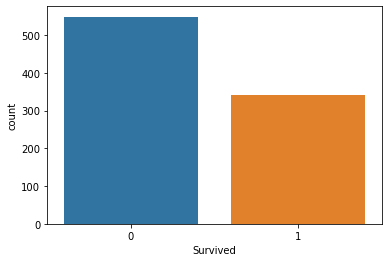

In [6]:
sns.countplot(x='Survived',data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

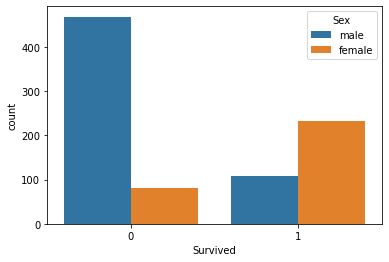

In [7]:
#male vs female
sns.countplot(x='Survived',data = titanic_data,hue = "Sex")

In [8]:
#checking for null
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

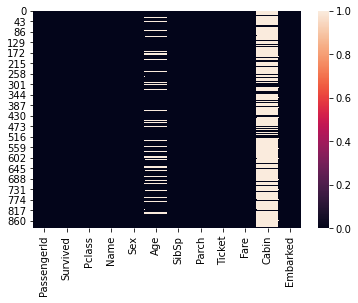

In [9]:
#visualize null value
sns.heatmap(titanic_data.isnull())

In [10]:
#find the % of null values of in age column
( titanic_data["Age"].isnull().sum() / len(titanic_data["Age"]) )*100

19.865319865319865

In [11]:
#find the % of null value in cabin column
( titanic_data["Cabin"].isnull().sum() / len(titanic_data["Cabin"]) )*100
#decided not include this column as 77% of data is missing. So at the time data handling we will remove this

77.10437710437711

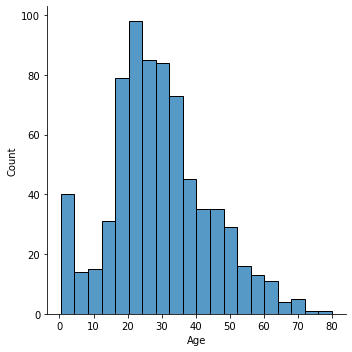

In [12]:
#distrubution for the age column
sns.displot(x = "Age" , data = titanic_data)

Data Cleaning

In [13]:
#filling age column with mean value of all the ages present in dataset
ageMean = titanic_data["Age"].mean()
titanic_data["Age"].fillna(ageMean)
titanic_data["Age"].isna().sum()

177

<AxesSubplot:>

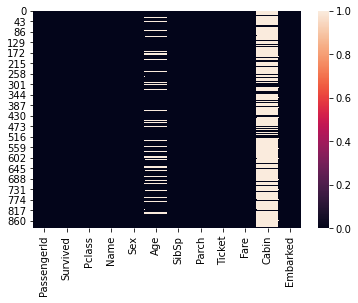

In [14]:
#visualize null values in dataset
sns.heatmap(data=titanic_data.isna())

In [15]:
#drop cabin column
titanic_data.drop("Cabin" , axis = "columns" , inplace = True)

#Preparing Data for Model
convert all non-numerical coulumns to numeric because we have to feed the data in model which does not accept non-numeric value

In [16]:
#check for the non-numeric column
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
#converting sex column to numerical values
gender = pd.get_dummies(titanic_data["Sex"] , drop_first=True)

In [18]:
titanic_data["Gender"] = gender
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [19]:
titanic_data.drop(["Name" , "Sex" , "Ticket", "Age" , "Embarked"], axis = 1 , inplace = True)

In [20]:
titanic_data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender
0,1,0,3,1,0,7.2500,1
1,2,1,1,1,0,71.2833,0
2,3,1,3,0,0,7.9250,0
3,4,1,1,1,0,53.1000,0
4,5,0,3,0,0,8.0500,1


In [21]:
#Seperate dependent and Independent variables

In [22]:
x = titanic_data[["PassengerId","Pclass","SibSp","Fare","Gender"]]
y = titanic_data["Survived"]
#Here, x = independed variabel and y = depended variabel


Data Modelling

In [23]:
#Building model using logistic Regression
#building the model

In [24]:
#importing train test split method
from sklearn.model_selection import train_test_split

In [25]:
#train test split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.33 , random_state = 42)

In [26]:
#importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [27]:
#fit logistic regression 
algo = LogisticRegression()

In [28]:
algo.fit(x_train,y_train)

LogisticRegression()

In [29]:
#predict
predict = algo.predict(x_test)

Testing

In [30]:
#seeing how our model is working
from sklearn.metrics import confusion_matrix

In [33]:
pd.DataFrame(confusion_matrix(y_test,predict),
             columns = ["Predicted No" , "Predicted Yes"] ,
             index = ["Actual No", "Actual Yes"])

,Predicted No,Predicted Yes
Actual No,153,22
Actual Yes,36,84


In [36]:
pd.DataFrame(confusion_matrix(y_test,predict),
             columns = ["0" , "1"] ,
             index = ["0", "1"])

,0,1
0,153,22
1,36,84


# importing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

#precision is fine considering model selected and available data. accuracy can be increseased by further using more feature and/or by using other model

Note:
Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations 
Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class F1 score - F1
Score is the weighted average of Precision and Recall.
